In [1]:
import numpy as np
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
import random

In [13]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()


x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_train, axis=1)

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics = ['accuracy'])

model.fit(x_train, y_train, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2579 - accuracy: 0.9249: 0s - loss: 0.2603 - accuracy: 0.
Epoch 2/3
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1058 - accuracy: 0.9679
Epoch 3/3
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0711 - accuracy: 0.9772


In [27]:
val_loss, val_acc = model.evaluate(x_test[:len(y_test)], y_test)
print(val_loss, val_acc)

313/313 [==============================] - 1s 2ms/step - loss: 11.8774 - accuracy: 0.1002
11.877366065979004 0.10019999742507935


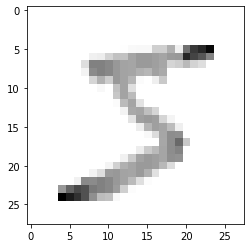

In [12]:
plt.imshow(x_train[0], cmap=plt.cm.binary)
plt.show()

In [28]:
model.save('mnist_num_reader.model')

INFO:tensorflow:Assets written to: mnist_num_reader.model\assets


In [30]:
new_model = tf.keras.models.load_model('mnist_num_reader.model')

In [31]:
predictions = new_model.predict([x_test])

In [46]:
print(np.argmax(predictions[5]))

2


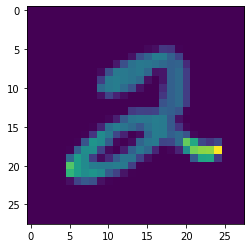

In [47]:
plt.imshow(x_test[5])